In [ ]:
pip install pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer


 **Create Your Own Event Log
You can customize the activities and dependencies to fit any process you have in mind.**

In [14]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define activity list with dependencies and variations
activities = {
    "Buy Online": ["Make Online Order"],
    "Make Online Order": ["Check Balance"],
    "Check Balance": ["Make Payment"],
    "Make Payment": ["Approve Payment"],
    "Approve Payment": ["Prepare Goods"],
    "Prepare Goods": ["Send Goods", "Notify Customer"],
    "Send Goods": [],
    "Notify Customer": ["Process Refund", "Add Money to Account"],
    "Process Refund": ["Get Customer Info", "Receive Refund"],
    "Get Customer Info": ["Make Refund"],
    "Make Refund": ["Receive Refund"],
    "Add Money to Account": ["Buy Online"],  # Directly connected back to Buy Online step
    "Receive Refund": [],
    "Buy At Store": ["Check Membership Account"],
    "Check Membership Account": ["Create Membership Account", "Receive Membership Card", "Pay Amount"],
    "Create Membership Account": ["Receive Membership Card", "Pay Amount"],
    "Receive Membership Card": ["Pay Amount"],
    "Pay Amount": []
}

# Define logical durations for each activity
logical_durations = {
    "Buy Online": timedelta(minutes=random.uniform(5, 10)),
    "Make Online Order": timedelta(minutes=random.uniform(1, 2)),
    "Check Balance": timedelta(seconds=random.uniform(30, 60)),
    "Make Payment": timedelta(minutes=random.uniform(2, 5)),
    "Approve Payment": timedelta(minutes=random.uniform(1, 2)),
    "Prepare Goods": timedelta(days=random.uniform(1, 7)),
    "Send Goods": timedelta(days=random.uniform(2, 4)),
    "Notify Customer": timedelta(days=random.uniform(1, 2)),
    "Process Refund": timedelta(days=random.uniform(1, 2)),
    "Add Money to Account": timedelta(days=random.uniform(7, 10)),
    "Get Customer Info": timedelta(seconds=random.uniform(3600, 864000)),  # 1 hour to 10 days
    "Make Refund": timedelta(days=random.uniform(7, 10)),
    "Receive Refund": timedelta(days=random.uniform(7, 10)),
    "Receive Membership Card": timedelta(minutes=random.uniform(2, 10)),
    "Pay Amount": timedelta(minutes=random.uniform(0.3333, 10)),  # 20 seconds to 10 minutes
    "Check Membership Account": timedelta(minutes=random.uniform(1, 5)),
    "Create Membership Account": timedelta(minutes=random.uniform(5, 15)),
}

# Function to generate logs for a single case
def generate_logs(case_id):
    logs = []
    purchase_method = random.choice(["Online", "At Store"])
    current_activity = f"Buy {purchase_method}"
    timestamp = datetime.now()
    while current_activity:
        logs.append((case_id, current_activity, timestamp))
        next_activities = activities[current_activity]
        if next_activities:
            current_activity = random.choice(next_activities)
            # Add logical duration to timestamp
            timestamp += logical_durations.get(current_activity, timedelta(seconds=0))
        else:
            break  # No subsequent activities defined, end the loop
    return logs

# Generate logs for multiple cases
def generate_dataset(num_cases):
    dataset = []
    for case_id in range(1, num_cases + 1):
        logs = generate_logs(case_id)
        dataset.extend(logs)
    return dataset

# Generate dataset
num_cases = 500
dataset = generate_dataset(num_cases)

# Create DataFrame from dataset
df = pd.DataFrame(dataset, columns=['Case ID', 'Activity', 'Timestamp'])

# Add resources and location columns
df['Resources'] = ''
df['Location'] = ''

# Populate resources and location columns based on activity
for case_id, group in df.groupby('Case ID'):
    if group.iloc[0]['Activity'].startswith('Buy At Store'):
        df.loc[df['Case ID'] == case_id, 'Resources'] = random.choice(['Store A', 'Store B', 'Store C'])  # Add random store name
    elif group.iloc[0]['Activity'].startswith('Buy Online'):
        df.loc[df['Case ID'] == case_id, 'Resources'] = random.choice(['Amazon', 'eBay', 'Alibaba'])  # Add random website name
    # Add random location
    df.loc[df['Case ID'] == case_id, 'Location'] = random.choice(['Toulouse', 'Paris', 'Dubai', 'New York', 'Tokyo', 'London'])

# Save logs to CSV file
df.to_csv('purchase_logs_loreal.csv', index=False)


**Process Mining using pm4py**
#Change your eventlog to Xes. You can use ProM framework


parsing log, completed traces ::   0%|          | 0/50 [00:00<?, ?it/s]

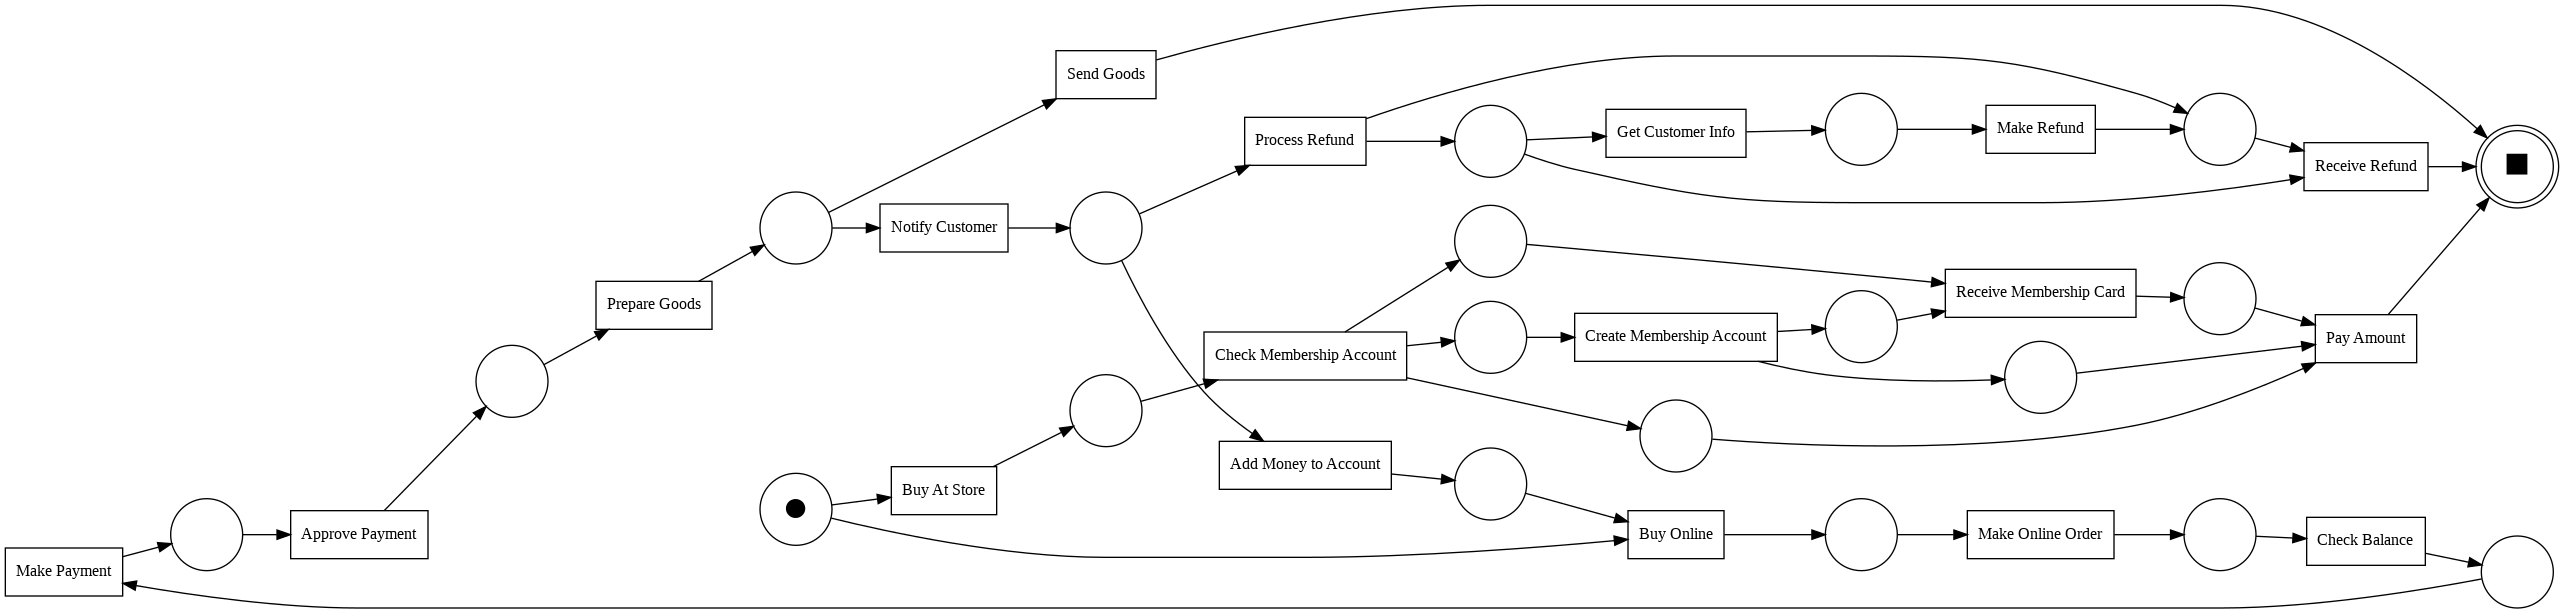

In [18]:
log_path = 'the Process .xes' # The xes file of the generated dataset

log = xes_importer.apply(log_path)

# Apply Alpha Miner algorithm
net, initial_marking, final_marking = alpha_miner.apply(log)

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

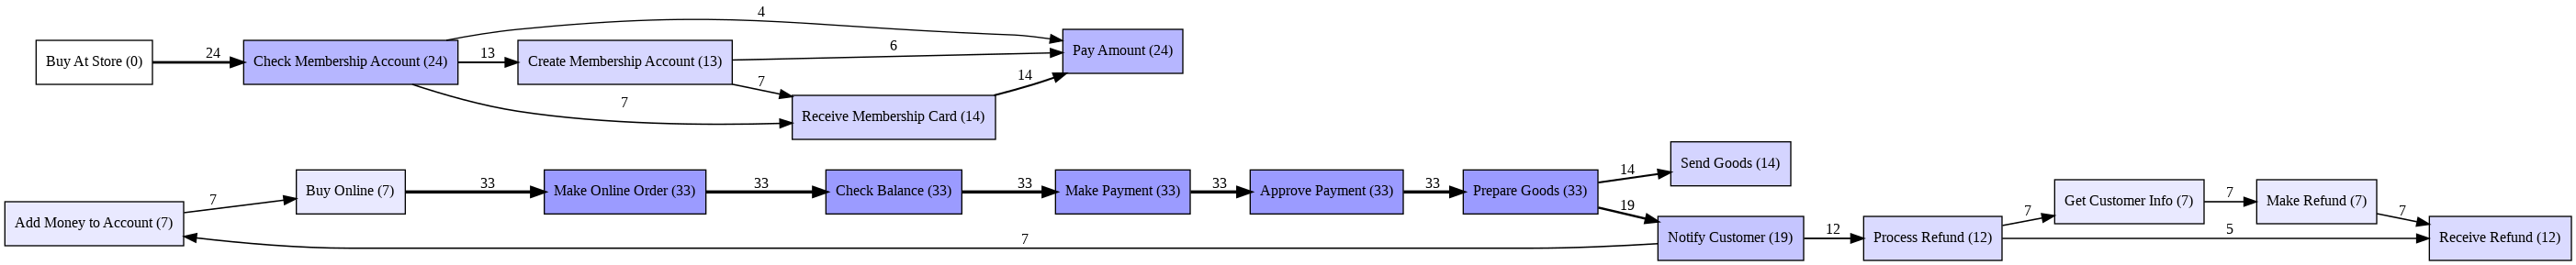

In [26]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from collections import Counter

# Discover the DFG
dfg = dfg_discovery.apply(log)

# Convert the DFG to a Counter object
activity_pairs_counts = Counter(dfg)

# Convert the Counter object to a dictionary
dfg_dict = dict(activity_pairs_counts)

# Visualize the DFG
gviz = dfg_visualizer.apply(dfg_dict, parameters={"format": "png"})
dfg_visualizer.view(gviz)
